In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("C:\\Users\\Nehal\\Downloads\\dataset.csv\\dataset.csv")

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [4]:
df.tail()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
91712,1671,53612,104,82.0,22.031250,1,Caucasian,F,160.0,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [6]:
df.isnull().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [7]:
df['age'] = df['age'].fillna(df['age'].mean())

In [8]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [9]:
df.drop(['Unnamed: 83'], axis=1, inplace=True)

In [10]:
df['apache_2_bodysystem'].fillna(value = 'mode', axis = 0, inplace = True)

In [11]:
df['apache_3j_bodysystem'].fillna(value = 'mode', axis = 0, inplace = True)

In [12]:
df['solid_tumor_with_metastasis'] = df['solid_tumor_with_metastasis'].fillna(df['solid_tumor_with_metastasis'].mean())

In [13]:
df['lymphoma'] = df['lymphoma'].fillna(df['lymphoma'].mean())

In [14]:
df.isnull().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
age                            0
bmi                            0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 84, dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(59248, 84)

In [17]:
df.hospital_death.value_counts()

0    54018
1     5230
Name: hospital_death, dtype: int64

In [18]:
df[df.duplicated(keep = 'last')] 

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death


In [19]:
df = df.drop_duplicates(subset = None, keep ='first')

In [20]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59248 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   59248 non-null  int64  
 1   patient_id                     59248 non-null  int64  
 2   hospital_id                    59248 non-null  int64  
 3   age                            59248 non-null  float64
 4   bmi                            59248 non-null  float64
 5   elective_surgery               59248 non-null  int64  
 6   ethnicity                      59248 non-null  object 
 7   gender                         59248 non-null  object 
 8   height                         59248 non-null  float64
 9   icu_admit_source               59248 non-null  object 
 10  icu_id                         59248 non-null  int64  
 11  icu_stay_type                  59248 non-null  object 
 12  icu_type                       59248 non-null 

In [22]:
df.dtypes[df.dtypes == 'object'].index

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')

In [23]:
df.dtypes[df.dtypes == 'float64'].index

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp

In [24]:
df.dtypes[df.dtypes == 'int64'].index

Index(['encounter_id', 'patient_id', 'hospital_id', 'elective_surgery',
       'icu_id', 'apache_post_operative', 'hospital_death'],
      dtype='object')

In [25]:
num_atr=['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'encounter_id', 'patient_id', 'hospital_id', 'elective_surgery',
       'icu_id', 'apache_post_operative']

cat_atr=['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem']

In [26]:
df.corr()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
encounter_id,1.000000,-0.001579,-0.005715,-0.003942,0.000045,-0.003048,-0.006056,-0.001587,-0.001125,-0.002994,...,-0.006394,0.001660,0.011043,0.005224,0.001190,-0.002244,-0.003148,-0.001061,-0.005654,-0.003899
patient_id,-0.001579,1.000000,-0.006369,0.005365,0.001328,0.004829,0.002698,-0.003089,-0.004769,0.002407,...,0.004610,-0.000638,0.003883,-0.001570,-0.002076,0.001295,0.000838,-0.001433,-0.006827,0.005446
hospital_id,-0.005715,-0.006369,1.000000,-0.008882,0.009743,0.041172,0.032640,0.037681,-0.000252,0.025559,...,0.004785,-0.006111,0.006485,0.010748,0.003871,0.000822,-0.004898,0.007248,-0.004633,0.001597
age,-0.003942,0.005365,-0.008882,1.000000,-0.079043,0.056783,-0.116504,-0.022079,0.054433,-0.122704,...,0.087724,-0.032513,-0.030867,0.065058,-0.024418,0.023687,0.030252,0.020467,0.026170,0.104260
bmi,0.000045,0.001328,0.009743,-0.079043,1.000000,0.009693,-0.052496,0.006031,-0.001183,0.880654,...,-0.018003,-0.021736,0.000086,0.173757,0.001462,-0.029341,-0.014424,-0.010151,-0.044690,-0.029227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
immunosuppression,-0.002244,0.001295,0.000822,0.023687,-0.029341,-0.010545,0.003570,-0.035523,0.037265,-0.027133,...,0.027862,0.023816,-0.003644,-0.004651,0.005732,1.000000,0.146189,0.101221,0.273501,0.043181
leukemia,-0.003148,0.000838,-0.004898,0.030252,-0.014424,-0.016296,0.001340,0.000778,0.050193,-0.014083,...,0.037485,-0.002775,-0.004206,0.002736,0.000587,0.146189,1.000000,0.026716,0.005145,0.032614
lymphoma,-0.001061,-0.001433,0.007248,0.020467,-0.010151,-0.010435,0.009122,-0.001539,0.016852,-0.004934,...,0.013855,0.022887,0.003517,-0.009317,0.000862,0.101221,0.026716,1.000000,0.011601,0.016345
solid_tumor_with_metastasis,-0.005654,-0.006827,-0.004633,0.026170,-0.044690,0.019885,0.009044,-0.012593,0.039238,-0.038415,...,0.033221,-0.000982,-0.006185,-0.011069,0.006241,0.273501,0.005145,0.011601,1.000000,0.055324


In [27]:
from sklearn.model_selection import train_test_split
X= df.drop(['hospital_death'], axis=1)
y= df['hospital_death']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
X_train[cat_atr].head()

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
10923,2,0,1,0,5,8,6
66264,2,0,0,0,6,7,4
10315,0,1,2,0,5,0,0
69023,2,1,0,0,7,9,0
68596,2,0,1,0,5,0,0


In [32]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-0.83078196, -0.93178086, -0.4145579 , ..., -0.4310728 ,
        -1.24746206, -0.46648642],
       [ 0.57716266, -0.35143805, -0.23890348, ..., -0.4310728 ,
         0.54295102, -0.46648642],
       [ 0.27108774, -1.66922979,  1.23104671, ...,  2.31979381,
        -1.24746206,  2.14368511],
       ...,
       [-1.07564189,  1.8411721 , -1.35754481, ..., -0.4310728 ,
        -1.78231964, -0.46648642],
       [-1.44293179, -0.58829683,  0.03844561, ..., -0.4310728 ,
        -0.51316606, -0.46648642],
       [-0.03498718, -0.6168549 , -1.1171756 , ..., -0.4310728 ,
         0.30725107, -0.46648642]])

In [33]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(41473, 83)

In [34]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(17775, 83)

In [35]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

In [36]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9218565400843882


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[16014,   205],
       [ 1184,   372]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16219
           1       0.64      0.24      0.35      1556

    accuracy                           0.92     17775
   macro avg       0.79      0.61      0.65     17775
weighted avg       0.91      0.92      0.91     17775



In [39]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [41]:
df.feature_names = df[['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem']]
df.target_names = df['hospital_death']

<ipython-input-41-33a6a0756397>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
<ipython-input-41-33a6a0756397>:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['hospital_death']


In [42]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

72    0.078489
71    0.073475
42    0.025378
44    0.022275
46    0.020357
        ...   
74    0.000806
78    0.000702
79    0.000345
73    0.000078
21    0.000000
Length: 83, dtype: float64

In [43]:
list(zip(df.columns, feature_imp))

[('encounter_id', 0.07848887577287887),
 ('patient_id', 0.0734750196102253),
 ('hospital_id', 0.025377911512495344),
 ('age', 0.022274705148629496),
 ('bmi', 0.020356908891903783),
 ('elective_surgery', 0.020102712039858407),
 ('ethnicity', 0.017884681775935385),
 ('gender', 0.017879472384471125),
 ('height', 0.017808824732501886),
 ('icu_admit_source', 0.01738541283539659),
 ('icu_id', 0.01735347360818386),
 ('icu_stay_type', 0.016667184310313173),
 ('icu_type', 0.015789448541233177),
 ('pre_icu_los_days', 0.015772295642480488),
 ('weight', 0.01564077758145735),
 ('apache_2_diagnosis', 0.015538832634427992),
 ('apache_3j_diagnosis', 0.015313970075364364),
 ('apache_post_operative', 0.015243982182450726),
 ('arf_apache', 0.014728780217339756),
 ('gcs_eyes_apache', 0.014720279103883679),
 ('gcs_motor_apache', 0.014625645134695766),
 ('gcs_unable_apache', 0.014282414717233563),
 ('gcs_verbal_apache', 0.014091681203504942),
 ('heart_rate_apache', 0.013895639162389502),
 ('intubated_apache

No handles with labels found to put in legend.


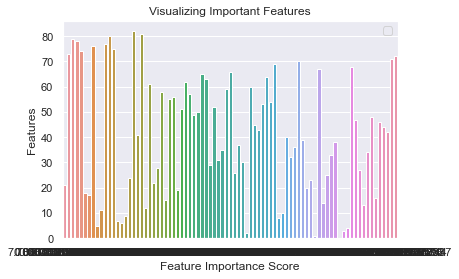

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9216877637130801


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16219
           1       0.65      0.23      0.34      1556

    accuracy                           0.92     17775
   macro avg       0.79      0.61      0.65     17775
weighted avg       0.91      0.92      0.90     17775



In [ ]:
from sklearn.model_selection import GridSearchCV
fit_rf = RandomForestClassifier(random_state=42)
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [ ]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2,
                 n_estimators=50)

In [ ]:
fit_rf.fit(X_train,y_train)

# prediction on test set
y_pred=fit_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2,
                 n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
fit_rf.fit(X_train,y_train)

# prediction on test set
y_pred=fit_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))